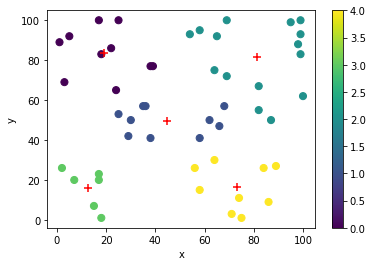

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from other import routing_one_ambulance, routing_for_4

df = pd.read_csv("sample1.csv")
number_of_hospital = 5

kmeans = KMeans(n_clusters= number_of_hospital)
kmeans.fit(df[['x', 'y']])
#df['cluster'] = kmeans.predict(df[['x', 'y']]).tolist()
x = df["x"]
y = df["y"]
Cluster = kmeans.labels_
#scatter = ax.scatter(x,y,c=Cluster,s=50)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=Cluster,s=50)
ax.set_xlabel('x')
ax.set_ylabel('y')
centers = kmeans.cluster_centers_
for i,j in centers:
    ax.scatter(i,j,s=50,c='red',marker='+')
plt.colorbar(scatter)

fig.show()

,x,y,time_to_live,cluster
0,68,28,115,3
1,16,77,94,2
2,32,69,144,2
3,66,5,115,3
4,100,72,129,0
...,...,...,...,...
293,69,68,99,0
294,62,34,71,3
295,26,43,89,1
296,41,96,143,2


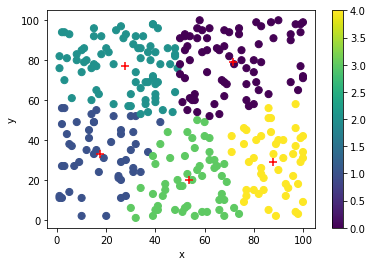

In [14]:
df = pd.read_csv("sample2.csv")
def plot_cluster(df, number_cluster):

    kmeans = KMeans(n_clusters= number_cluster)
    kmeans.fit(df[['x', 'y']])
    x = df["x"]
    y = df["y"]
    Cluster = kmeans.labels_
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(x,y,c=Cluster,s=50)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    centers = kmeans.cluster_centers_
    for i,j in centers:
        ax.scatter(i,j,s=50,c='red',marker='+')
    plt.colorbar(scatter)

    fig.show()
    df["cluster"] = kmeans.labels_
    return df
plot_cluster(df, 5)

In [15]:
df = pd.read_csv("sample2.csv")
number_of_hospital = 5
num_ambulance_at_hospital = [6, 5, 5, 3, 3]

kmeans = KMeans(n_clusters= number_of_hospital)
kmeans.fit(df[['x', 'y']])
df["cluster"] = kmeans.labels_
cluster_locations = kmeans.cluster_centers_


In [16]:
import heapq
from collections import Counter, defaultdict
heap = []
for i, count in enumerate(num_ambulance_at_hospital):
    heap.append((-count, i))
heapq.heapify(heap)

print(heap)

cluster_map = {}
counter = Counter(kmeans.labels_)
print(counter)

for i, (elem, count) in enumerate(counter.most_common()):
    count, hospital_idx = heapq.heappop(heap)
    print(-count, hospital_idx)
    cluster_map[elem] = hospital_idx

print(cluster_map)

hospital_number = []
for cluster_num in kmeans.labels_:
    hospital_idx = cluster_map[cluster_num]
    hospital_number.append(hospital_idx)
df["hospital_number"] = hospital_number

[(-6, 0), (-5, 1), (-5, 2), (-3, 3), (-3, 4)]
Counter({2: 78, 0: 70, 1: 54, 3: 50, 4: 46})
6 0
5 1
5 2
3 3
3 4
{2: 0, 0: 1, 1: 2, 3: 3, 4: 4}


In [57]:
patients_picked = []
am_number = 0
for cluster_num in range(number_of_hospital):

    hospital_number = cluster_map[cluster_num]

    df_hospital = df.loc[df['hospital_number'] == hospital_number]
    hospital_location = cluster_locations[cluster_num]
    hospital_total_ambulance = num_ambulance_at_hospital[hospital_number]

    df_hospital = plot_cluster(df_hospital, hospital_total_ambulance)

    df_hospital["time_to_hospital"] = abs(df_hospital["x"] - hospital_location[0]) + abs(df_hospital["y"]-hospital_location[1])
    
    for ambulance_no in range(hospital_total_ambulance):
        df_ambulance = df_hospital.loc[df_hospital['cluster'] == ambulance_no]
        df_ambulance["index"] = df_ambulance.index
        print("printing for the ambulance", am_number)
        patients_picked.append(routing_one_ambulance(df_ambulance))
        am_number = am_number + 1






printing for the ambulance 0
      x   y  time_to_live  cluster  hospital_number  time_to_hospital  index
8    83  79            79        0                1         10.757143      8
29   77  76           137        0                1          7.757143     29
54   70  94           119        0                1         17.242857     54
56   74  93           118        0                1         15.071429     56
97   74  96           137        0                1         18.071429     97
116  68  95            95        0                1         20.242857    116
153  75  80           135        0                1          3.071429    153
154  70  82           119        0                1          5.242857    154
173  80  80           136        0                1          8.071429    173
177  65  86           117        0                1         14.242857    177
226  82  88            89        0                1         18.071429    226
243  68  87            53        0             

KeyboardInterrupt: 